# Racing Line Calculation Worksheet

Inspired by the paper [Reinforcement Learning Using Neural Networks, with Applications to Motor Control
](https://www.remi-coulom.fr/Publications/Thesis.pdf), which is referenced by a number of machine learning articles, we calculate a race line around a simple race track.

In [1]:
# !pip3 install matplotlib
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install scipy
# !pip3 install shapely

In [2]:
import glob
import math
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd

from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString


In [3]:
np.set_printoptions(formatter={"float_kind": lambda x: "{0:0.8f}".format(x)})


def get_distance(coor1, coor2):
    return math.sqrt((coor1[0] - coor2[0]) * (coor1[0] - coor2[0]) + (coor1[1] - coor2[1]) * (coor1[1] - coor2[1]))


def get_radians(coor1, coor2):
    return math.atan2((coor2[1] - coor1[1]), (coor2[0] - coor1[0]))


def get_border_waypoints(points1, points2, rate=1.2):
    length = min(len(points1), len(points2))
    results = []
    for i in range(0, length):
        dist = get_distance(points1[i], points2[i]) * rate
        angle = get_radians(points1[i], points2[i])
        results.append(
            [
                dist * math.cos(angle) + points1[i][0],
                dist * math.sin(angle) + points1[i][1],
            ]
        )
    return results


## Load the track to analyze

In [4]:
# Conveniently list available tracks to analyze
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split(".npy")[0], available_track_files))
sorted(available_track_names)


['2022_april_open',
 '2022_april_open_ccw',
 '2022_april_open_cw',
 '2022_april_pro',
 '2022_april_pro_ccw',
 '2022_april_pro_cw',
 '2022_august_open',
 '2022_august_open_ccw',
 '2022_august_open_cw',
 '2022_august_pro',
 '2022_august_pro_ccw',
 '2022_august_pro_cw',
 '2022_july_open',
 '2022_july_pro',
 '2022_july_pro_ccw',
 '2022_july_pro_cw',
 '2022_june_open',
 '2022_june_open_ccw',
 '2022_june_open_cw',
 '2022_june_pro',
 '2022_june_pro_ccw',
 '2022_june_pro_cw',
 '2022_march_open',
 '2022_march_open_ccw',
 '2022_march_open_cw',
 '2022_march_pro',
 '2022_march_pro_ccw',
 '2022_march_pro_cw',
 '2022_may_open',
 '2022_may_open_ccw',
 '2022_may_open_cw',
 '2022_may_pro',
 '2022_may_pro_ccw',
 '2022_may_pro_cw',
 '2022_october_open',
 '2022_october_open_ccw',
 '2022_october_open_cw',
 '2022_october_pro',
 '2022_october_pro_ccw',
 '2022_october_pro_cw',
 '2022_reinvent_champ',
 '2022_september_open',
 '2022_september_open_ccw',
 '2022_september_open_cw',
 '2022_september_pro',
 '2022_s

Is loop/ring?  True


<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


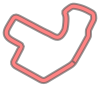

In [5]:
# Replace the name here with the track to analyze
TRACK_NAME = "reInvent2019_track_ccw"

# Number of times to iterate each new race line point
# keep this at 3-8 for best balance of performance and desired result
XI_ITERATIONS = 5

# Number of times to scan the entire race track to iterate
# 500 will get a good start, 1500 will be closer to optimal result
LINE_ITERATIONS = 500

# Load the center, inner, outer waypoints
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Convert to Shapely objects
center_line = waypoints[:, 0:2]
inner_border = waypoints[:, 2:4]
outer_border = waypoints[:, 4:6]

l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)

road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))
print("Is loop/ring? ", l_center_line.is_ring)
road_poly


# Display the original track waypoints

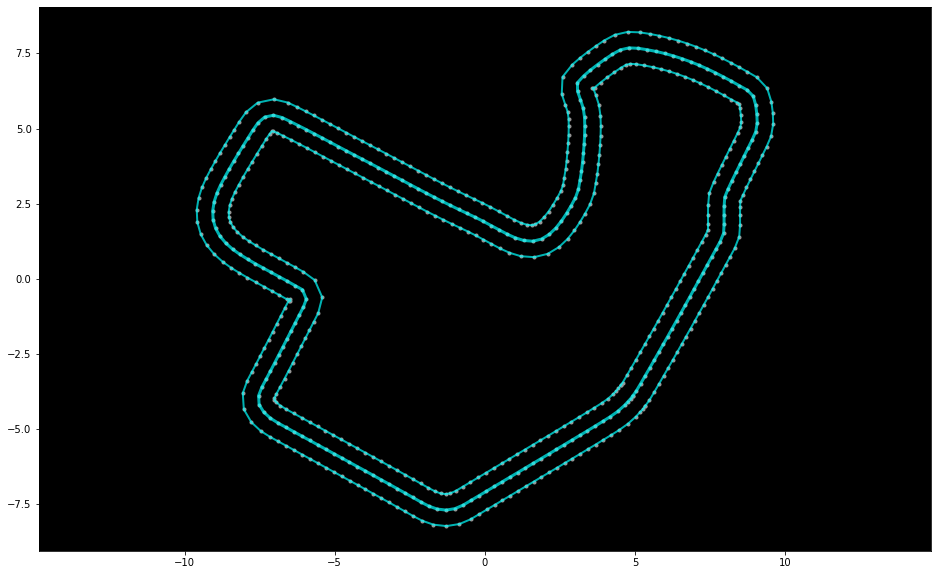

In [6]:
def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, ".", color="#999999", zorder=1)


def plot_bounds(ax, ob):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, ".", color="#000000", zorder=1)


def plot_line(ax, ob, width):
    x, y = ob.xy
    ax.plot(x, y, color="cyan", alpha=0.7, linewidth=width, solid_capstyle="round", zorder=2)


def print_border(ax, waypoints, width=2):
    line = LineString(waypoints)
    plot_coords(ax, line)
    plot_line(ax, line, width)


fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor="black")
plt.axis("equal")
print_border(ax, center_line, 3)

print_border(ax, inner_border)
print_border(ax, outer_border)



In [7]:
# From https://github.com/e-koch/ewky_scripts/blob/master/curvature.py

# The MIT License (MIT)
#
# Copyright (c) 2014 Eric Koch
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


def menger_curvature(pt1, pt2, pt3, atol=1e-3):
    vec21 = np.array([pt1[0] - pt2[0], pt1[1] - pt2[1]])
    vec23 = np.array([pt3[0] - pt2[0], pt3[1] - pt2[1]])

    norm21 = np.linalg.norm(vec21)
    norm23 = np.linalg.norm(vec23)

    theta = np.arccos(np.dot(vec21, vec23) / (norm21 * norm23))
    if np.isclose(theta - np.pi, 0.0, atol=atol):
        theta = 0.0

    dist13 = np.linalg.norm(vec21 - vec23)

    return 2 * np.sin(theta) / dist13


In [8]:
import copy

from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

# # Number of times to iterate each new race line point
# # keep this at 3-8 for best balance of performance and desired result
# XI_ITERATIONS=5

# # Number of times to scan the entire race track to iterate
# # 500 will get a good start, 1500 will be closer to optimal result
# LINE_ITERATIONS=500


def improve_race_line(old_line, inner_border, outer_border):
    """Use gradient descent, inspired by K1999, to find the racing line"""
    # start with the center line
    new_line = copy.deepcopy(old_line)
    ls_inner_border = Polygon(inner_border)
    ls_outer_border = Polygon(outer_border)
    for i in range(0, len(new_line)):
        xi = new_line[i]
        npoints = len(new_line)
        prevprev = (i - 2 + npoints) % npoints
        prev = (i - 1 + npoints) % npoints
        nexxt = (i + 1 + npoints) % npoints
        nexxtnexxt = (i + 2 + npoints) % npoints
        # print("%d: %d %d %d %d %d" % (npoints, prevprev, prev, i, nexxt, nexxtnexxt))
        ci = menger_curvature(new_line[prev], xi, new_line[nexxt])
        c1 = menger_curvature(new_line[prevprev], new_line[prev], xi)
        c2 = menger_curvature(xi, new_line[nexxt], new_line[nexxtnexxt])
        target_ci = (c1 + c2) / 2
        # print("i %d ci %f target_ci %f c1 %f c2 %f" % (i, ci, target_ci, c1, c2))

        # Calculate prospective new track position, start at half-way (curvature zero)
        xi_bound1 = copy.deepcopy(xi)
        xi_bound2 = ((new_line[nexxt][0] + new_line[prev][0]) / 2.0, (new_line[nexxt][1] + new_line[prev][1]) / 2.0)
        p_xi = copy.deepcopy(xi)
        for j in range(0, XI_ITERATIONS):
            p_ci = menger_curvature(new_line[prev], p_xi, new_line[nexxt])
            # print("i: {} iter {} p_ci {} p_xi {} b1 {} b2 {}".format(i,j,p_ci,p_xi,xi_bound1, xi_bound2))
            if np.isclose(p_ci, target_ci):
                break
            if p_ci < target_ci:
                # too flat, shrinking track too much
                xi_bound2 = copy.deepcopy(p_xi)
                new_p_xi = ((xi_bound1[0] + p_xi[0]) / 2.0, (xi_bound1[1] + p_xi[1]) / 2.0)
                if Point(new_p_xi).within(ls_inner_border) or not Point(new_p_xi).within(ls_outer_border):
                    xi_bound1 = copy.deepcopy(new_p_xi)
                else:
                    p_xi = new_p_xi
            else:
                # too curved, flatten it out
                xi_bound1 = copy.deepcopy(p_xi)
                new_p_xi = ((xi_bound2[0] + p_xi[0]) / 2.0, (xi_bound2[1] + p_xi[1]) / 2.0)

                # If iteration pushes the point beyond the border of the track,
                # just abandon the refinement at this point.  As adjacent
                # points are adjusted within the track the point should gradually
                # make its way to a new position.  A better way would be to use
                # a projection of the point on the border as the new bound.  Later.
                if Point(new_p_xi).within(ls_inner_border) or not Point(new_p_xi).within(ls_outer_border):
                    xi_bound2 = copy.deepcopy(new_p_xi)
                else:
                    p_xi = new_p_xi
        new_xi = p_xi
        # New point which has mid-curvature of prev and next points but may be outside of track
        # print((new_line[i], new_xi))
        new_line[i] = new_xi
    return new_line


## Calculate the race line!

In [9]:
print(len(center_line))
# start along centerline of track
race_line = copy.deepcopy(center_line[:-1])  # Use this for centerline being outer bound
for i in range(LINE_ITERATIONS):
    race_line = improve_race_line(race_line, inner_border, outer_border)
    # race_line = improve_race_line(race_line, inner_border2, outer_border2)
    if i % 20 == 0:
        print("Iteration %d" % i)
print(len(race_line))


/var/folders/9d/kdbllg210csbg8s6p2gwnc_80000gn/T/ipykernel_81726/3807743724.py:33: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(vec21, vec23) / (norm21 * norm23))


203
Iteration 0
Iteration 20
Iteration 40
Iteration 60
Iteration 80
Iteration 100
Iteration 120
Iteration 140
Iteration 160
Iteration 180
Iteration 200
Iteration 220
Iteration 240
Iteration 260
Iteration 280
Iteration 300
Iteration 320
Iteration 340
Iteration 360
Iteration 380
Iteration 400
Iteration 420
Iteration 440
Iteration 460
Iteration 480
202


These should be the same:  ((203, 2), (203, 2))
Original centerline length: 60.17
New race line length: 55.26


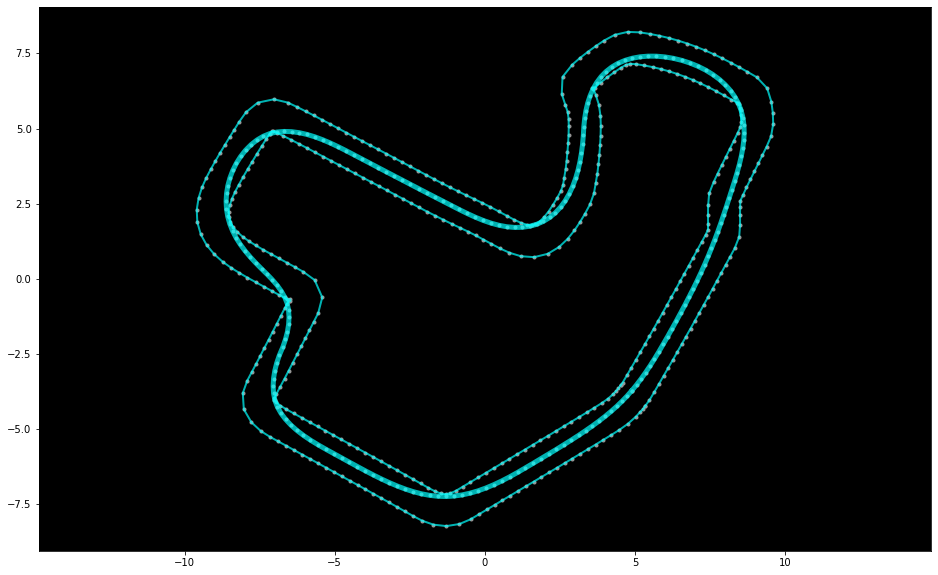

In [10]:
# need to put duplicate point race_line[0] at race_line[-1] to make a closed loops
loop_race_line = np.append(race_line, [race_line[0]], axis=0)

# These should be the same
print("These should be the same: ", (center_line.shape, loop_race_line.shape))
print("Original centerline length: %0.2f" % l_center_line.length)
print("New race line length: %0.2f" % LineString(loop_race_line).length)

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor="black")
plt.axis("equal")
print_border(ax, loop_race_line, 5)
print_border(ax, inner_border)
print_border(ax, outer_border)


## Save the raceline as:

1. Binary numpy array for loading from a file
2. Text numpy array for pasting directly into a reward function

In [11]:
from datetime import datetime

now = datetime.now()
prefix = "./outputs/racelines/%s-%d-%d" % (TRACK_NAME, XI_ITERATIONS, LINE_ITERATIONS)

py_fname = prefix + ".py"
py_center_fname = prefix + "-center.py"
py_inner_fname = prefix + "-inner.py"
py_outer_fname = prefix + "-outer.py"

npy_fname = prefix + ".npy"
npy_inner_fname = prefix + "-inner.npy"
npy_outer_fname = prefix + "-outer.npy"

with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(loop_race_line))

with open(py_center_fname, "w") as file:
    print("Writing python code to %s" % py_center_fname)
    file.write(np.array_repr(center_line))

with open(py_inner_fname, "w") as file:
    print("Writing python code to %s" % py_inner_fname)
    file.write(np.array_repr(inner_border))

with open(py_outer_fname, "w") as file:
    print("Writing python code to %s" % py_outer_fname)
    file.write(np.array_repr(outer_border))

print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, loop_race_line)

np.save(npy_inner_fname, inner_border)
np.save(npy_outer_fname, outer_border)


Writing python code to ./outputs/racelines/2022_september_pro_cw-5-500.py
Writing python code to ./outputs/racelines/2022_september_pro_cw-5-500-center.py
Writing python code to ./outputs/racelines/2022_september_pro_cw-5-500-inner.py
Writing python code to ./outputs/racelines/2022_september_pro_cw-5-500-outer.py
Writing numpy binary to ./outputs/racelines/2022_september_pro_cw-5-500.npy


# Load and visualize a stored track file

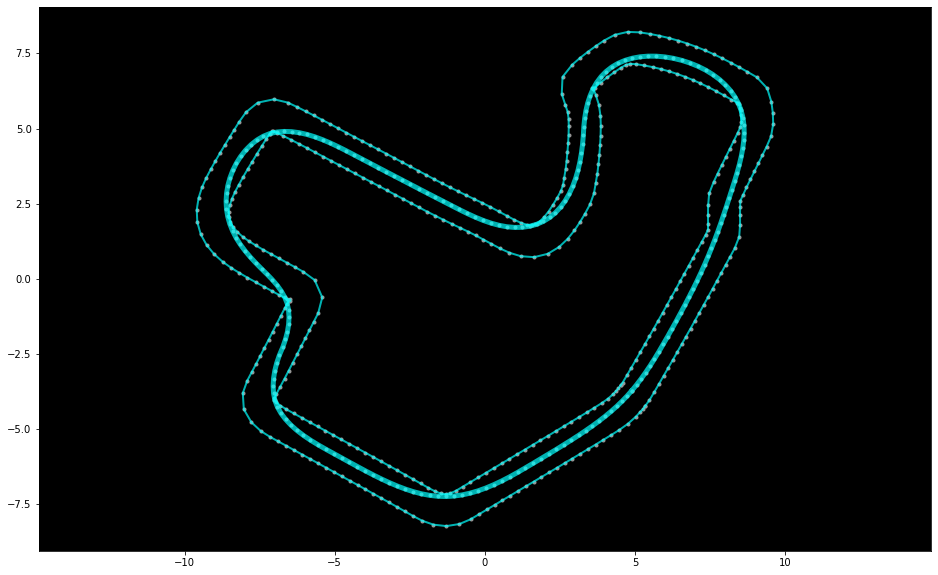

In [12]:
from numpy import array

# fname = './outputs/racelines/reInvent2019_track-1000-4-2019-11-09-113228.py'

with open(py_fname, "r") as file:
    deserialized = eval(file.read())
deserialized

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, deserialized, 5)
print_border(ax, inner_border)
print_border(ax, outer_border)
# print_border(ax, inner_border3, 1)
# print_border(ax, outer_border3, 1)